In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from IPython.display import HTML
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score
from sklearn.metrics import accuracy_score

In [280]:
X_train = pd.read_csv('transformed_data/X_train.csv')
y_train = pd.read_csv('transformed_data/y_train.csv')
X_test = pd.read_csv('transformed_data/X_test.csv')
y_test = pd.read_csv('transformed_data/y_test.csv')
feature_names = X_train.columns.values.tolist()

In [281]:
clf = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf = clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
# tree.plot_tree(clf)

0.9264934488119032
0.9169986719787516


In [282]:
path = tree.DecisionTreeClassifier().cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas
clfs = []

for alpha in alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
# best_model

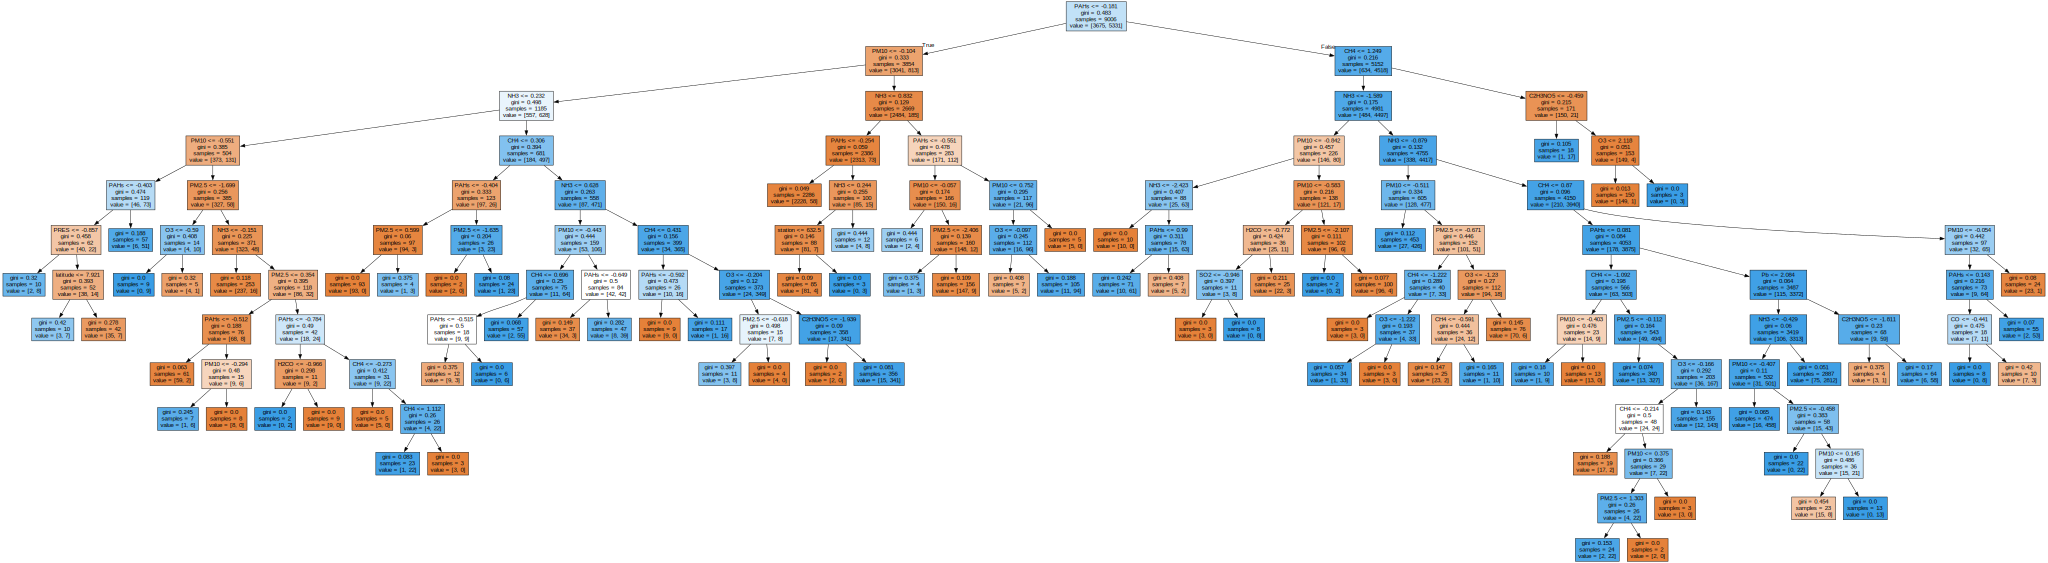

In [283]:
graph = Source(export_graphviz(best_model,
                               out_file=None,
                               feature_names=feature_names,
                               filled = True))

display(SVG(graph.pipe(format='svg')))

style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

In [284]:
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.9592493892960249
0.9355909694555112


In [285]:
# y_train_pred = best_model.predict(X_train)
# y_test_pred = best_model.predict(X_test)
# display(precision_recall_fscore_support(y_train, y_train_pred, average='micro'))
# display(precision_recall_fscore_support(y_test, y_test_pred, average='micro'))

In [286]:
oneR_train_data = X_train.copy()
oneR_train_data['warning'] = y_train['warning']
oneR_train_data.head(20)

,QoS,station,code,latitude,longitude,revision,PM10,CO,Pb,C2H3NO5,...,O3,TEMP,NOx,SO2,NH3,CH4,PRES,PM2.5,PAHs,warning
0,4.0,43.0,50.0,22.10194,85.37752,1.647475e+09,0.192612,0.235381,-0.656926,0.223443,...,0.689035,0.173274,0.971455,-0.773141,0.819831,-0.395295,-0.007910,-0.172965,0.466174,1.0
1,1.0,325.0,109.0,45.16024,-93.08883,1.639008e+09,0.053826,2.362765,0.072556,0.069711,...,-1.242124,-0.226155,0.573091,1.808388,-1.611774,-1.937594,0.413985,1.383006,0.266666,0.0
2,0.0,552.0,83.0,12.97389,123.99333,1.564877e+09,0.111533,-0.858182,1.523064,0.149013,...,0.499272,0.699226,0.449509,-0.750974,0.174519,0.472786,1.189258,-1.994971,-1.046705,0.0
3,5.0,633.0,109.0,41.57721,-93.71133,1.587773e+09,0.888138,-0.119180,2.020480,0.892618,...,0.928801,-2.216066,-1.878103,0.162973,-5.190877,3.179916,2.243290,1.753005,-0.531992,0.0
4,3.0,169.0,25.0,49.13645,8.91229,1.643069e+09,1.064280,-0.444004,0.052757,1.053852,...,-0.190465,-0.241386,-0.844146,0.390850,-1.019384,2.266710,0.752544,1.914072,0.077794,0.0
5,0.0,373.0,52.0,45.50369,11.41200,1.463616e+09,0.034209,1.384383,0.902099,-0.089169,...,0.834579,-0.716998,-0.629598,-0.055465,1.016333,0.272159,1.331916,0.324924,-0.280845,1.0
6,0.0,569.0,33.0,39.96348,-4.83076,1.648858e+09,-1.329113,0.335597,-0.492546,-0.798712,...,-0.826300,-0.626360,0.770790,1.650726,-0.401476,0.274955,-1.280477,-0.719189,0.733814,1.0
7,3.0,23.0,93.0,11.86590,34.38690,1.559866e+09,-0.209867,-0.239563,0.669783,-0.356269,...,-1.208538,1.189072,0.968553,2.086747,-1.659421,0.026198,-0.662911,-0.928390,-0.826762,0.0
8,3.0,444.0,47.0,0.51667,101.44167,1.638749e+09,0.258066,-1.686677,-1.389147,0.257278,...,-0.004397,-0.986540,-1.217433,-1.674775,0.400736,-0.568381,1.906412,0.466866,0.306533,1.0
9,1.0,310.0,19.0,5.84752,-5.68200,1.645056e+09,-1.534432,1.059623,-0.867330,-1.171648,...,-0.367670,-0.908298,1.000924,-0.032335,-0.604851,-0.811857,0.191393,0.958218,1.137435,1.0


In [287]:
def oneR(df, column, split):
    if df[column][0] < split:
        if df['warning'][0] == 1:
            pw1 = 1
            pw2 = 0
        else:
            pw1 = 9
            pw2 = 1
    else:
        if df['warning'][0] == 1:
            pw1 = 0
            pw2 = 1
        else:
            pw1 = 1
            pw2 = 0

    df.loc[df[column] < split, 'predicted_warning'] = pw1
    df.loc[df[column] >= split, 'predicted_warning'] = pw2

    accuracy = accuracy_score(df['warning'], df['predicted_warning'])
    precision = precision_score(df['warning'], df['predicted_warning'])
    recall = recall_score(df['warning'], df['predicted_warning'])
    total=(accuracy + precision + recall) / 3

    df.drop('predicted_warning', axis=1, inplace=True)

    return [accuracy, precision, recall, total]

best column from oneR: PAHs
total: 0.8479484758942056
accuracy: 0.8479484758942056
precision: 0.8894308943089431
recall: 0.820859125867567


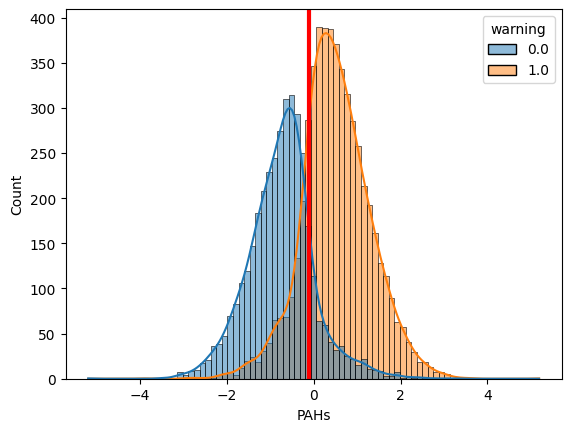

In [288]:
best_accuracy = 0
best_split = 0
best_column = 0
best_precision = 0
best_recall = 0
best_total = 0

for column in oneR_train_data.columns:
    if column != 'warning':
        split = (oneR_train_data[column][oneR_train_data['warning'] == 0].mean() + oneR_train_data[column][oneR_train_data['warning'] == 1].mean())/2
        accuracy, precision, recall, total = oneR(oneR_train_data, column, split)
        if total > best_accuracy:
            best_split = split
            best_column = column
            best_accuracy = total
            best_precision = precision
            best_recall = recall
            best_total = total

print('best column from oneR: ' + best_column)
print('total: ' + str(best_total))
print('accuracy: ' + str(best_accuracy))
print('precision: ' + str(best_precision))
print('recall: ' + str(best_recall))

sns.histplot(data=oneR_train_data, hue='warning', x=best_column, fill=True, kde=True)
plt.axvline(best_split, linewidth=3, color='r')
plt.show()